In [1]:
import numpy as np
from math import comb
import sympy as sp
from sympy.abc import m
import matplotlib.pyplot as plt

### Computing the sum from Method 1

In [2]:
sum = 0
for k in range(13):
    sum += 0.5**(24-k)*comb(24-k,k)
print(sum)

0.6666666865348816


### Solving the recurrence relation from Method 2, using the method of characteristics

In [3]:
M = sp.solve(2*m**2-m-1, m) # solving characteristic polynomial, solutions are M[0] and M[1]

x, y = sp.symbols("x,y")
A = sp.Matrix([[M[0], M[1]], [M[0]**2, M[1]**2]])
b = sp.Matrix([1, 0.5])
C,= sp.linsolve((A, b), x, y) # solving linear system

def P(n):
    return C[0]*M[0]**n + C[1]*M[1]**n

print(P(25))

0.666666686534882


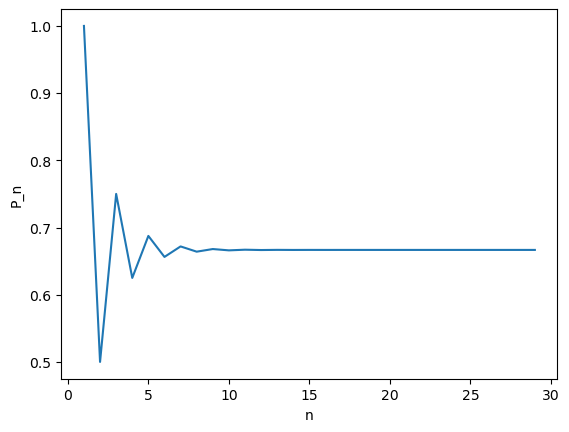

In [4]:
n_values = np.arange(1,30)
plt.plot(n_values, P(n_values))
plt.xlabel("n")
plt.ylabel("P_n")
plt.show()

### Extension

In [5]:
def P(n,p):
    return (4*(p-1)/3)*(-1/2)**n + ((2*p)+1)/3

print("Probability of landing on 25 when p=0.5: ", P(25, 0.5))
print("Probability of landing on 25 when p=1 (expected value 1): ", P(25, 1)) # this should print 1, because if you only throw 1's then you are guaranteed to land on every number
print("Probability of landing on 24 when p=0.5 (expected value 0): ", P(24, 0)) # this should print 0, because if you only throw 2's then it is impossible to land on an even number

Probability of landing on 25 when p=0.5:  0.6666666865348816
Probability of landing on 25 when p=1 (expected value 1):  1.0
Probability of landing on 24 when p=0.5 (expected value 0):  0.33333325386047363
